In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPLEMENTING MULTIPLE LINEAR REGRESSION WITH BATCH GRADIENT DESCENT

In [9]:
df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\coursera_ml\\data2.csv')
#.read_csv() inherently gets rid of the first row expecting that it might be a name row
arr = df.to_numpy()
print(arr)

[[2104    5    1   45  460]
 [1416    3    2   40  232]
 [ 852    2    1   35  178]]


In [10]:
m = arr.shape[0]  #number of rows, or training egs
n = arr.shape[1]-1  #number of cols or features
print(m, n)

3 4


In [11]:
x_train = []
y_train = []

for i in range(m):
    x_train.append(arr[i][:n])
    y_train.append(arr[i][n])

x_train = np.array(x_train) #2nd order tensor
y_train = np.array(y_train)  #1st order tensor


print(x_train)
print(y_train)

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
[460 232 178]


In [12]:
#func to scale the features

def z_score_norm(x):

    """
    func to normalise the features using z score normalisation

    Args:
        x (ndarray (m,n)): the input feature matrix
    
    returns:
        x_norm (ndarray (m,n)): the scaled features 
        mu (ndarray (n,)): the mean values for each of the features
        sigma (ndarray (n,)): the std dev values for each of the features    
    """

    mu = np.mean(x, axis=0)   #returns ndarray (n,)
    sigma = np.std(x, axis=0)  # same 

    x_norm = (x-mu)/sigma #the ndarray(m,n) with normalisation

    return x_norm, mu, sigma


In [13]:
#func to calculate cost

def calculate_cost(x, y, w, b, m):

    """
    used to find the cost value at any instant of the model
    Args:
        x (ndarray (m,n)): 2d np array of the features
        y (ndarray (m,)): 1d np array of the targets
        w (ndarray (n,)): 1d np array of the weights
        b (scalar): bias
        m (scalar): number of rows
    
    Returns:
        cost (scalar): the cost value
    """
    
    cost = 0
    for i in range(m):
        cost += (np.dot(w, x[i]) + b - y[i])**2
    cost /= (2*m)

    return cost

In [14]:
#func to find gradient vector, dJ_db

def calculate_gradient(x, y, w, b, m, n):

    """
    used to find the gradient vector and dJ_db
    Args:
        x (ndarray (m,n)): 2d np array of the features
        y (ndarray (m,)): 1d np array of the targets
        w (ndarray (n,)): 1d np array of the weights
        b (scalar): bias
        m (scalar): number of rows
        n (scalar): number of cols
    
    Returns:
        d (ndarray (n,)): 1d np array containing gradient of each of the weights wrt cost
        dJ_db (scalar): the gradient of cost wrt bias
    """


    d = [] #gradient vector
    dJ_db = 0

    for i in range(n):
        d.append(sum([(np.dot(w, x[j]) + b - y[j])*x[j][i] for j in range(m)])/m)
    
    for k in range(m):
        dJ_db += (np.dot(w, x[k]) + b - y[k])

    dJ_db /= m

    d = np.array(d)

    return d, dJ_db

In [15]:
#main algo

def linear_regr(x, y, w, b, m, n, a, e):

    """
    Updates the values of w,b to find the best fit line
    Args:
        x (ndarray (m,n)): feature data
        y (ndarray (m,)): target data, m samples
        w (scalar): weight
        b (scalar): bias
        m (scalar): number of traning samples
        n (scalar): number of features
        a (scalar): learning rate
        e (scalar): number of epochs
    Returns:
        w (ndarray (n,)): updated w vector
        b (scalar): updated b
        e_history (list): list of 1000th epoch
        cost_history (list): list of cost at every 1000th epoch
    """

    e_history = []
    cost_history = []

    for i in range(e):
        d, dJ_db = calculate_gradient(x, y, w, b, m, n)
        w -= a*d
        b -= a*dJ_db

        if (i+1)%100 == 0:
            J = calculate_cost(x, y, w, b, m)
            print(f"Iteration: {i+1} cost: {J}")
            e_history.append(i+1)
            cost_history.append(J)

    return w, b, e_history, cost_history

In [16]:
w_in = np.zeros(n)
b_in = 0
a = 0.01  #learning rate when normalisation was not applied was 5.0e-7 which is far smaller than this 
epochs = 1000  


x_train_scaled, mu, sigma = z_score_norm(x_train)

w, b, e_history, cost_history = linear_regr(x_train_scaled, y_train, w_in, b_in, m, n, a, epochs)
print(w)
print(b)

Iteration: 100 cost: 5696.456831225135
Iteration: 200 cost: 760.941920822248
Iteration: 300 cost: 101.93136706123856
Iteration: 400 cost: 13.65482285574898
Iteration: 500 cost: 1.8292190201541931
Iteration: 600 cost: 0.24504530908226405
Iteration: 700 cost: 0.03282676607046066
Iteration: 800 cost: 0.0043975502616099916
Iteration: 900 cost: 0.0005891074439312887
Iteration: 1000 cost: 7.891856483644776e-05
[ 38.05168398  41.54320558 -30.98791712  36.34190238]
289.987480338251


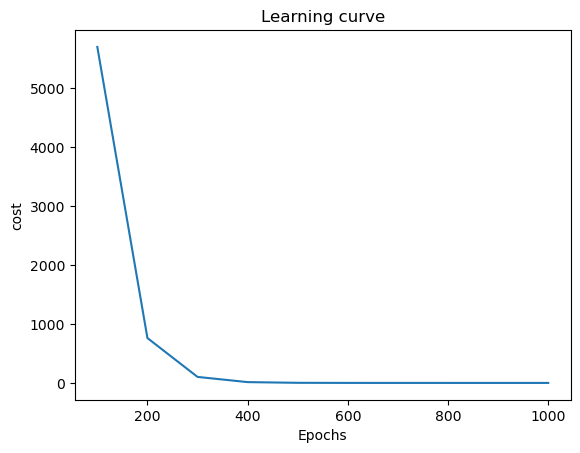

In [17]:
plt.plot(e_history, cost_history)
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("cost")
plt.show()

In [18]:
#cost history when feature scaling was not used, and a = 5.0e-7

#Iteration: 100 cost: 696.0010595124644
# Iteration: 200 cost: 694.9313476914762
# Iteration: 300 cost: 693.8709864577195
# Iteration: 400 cost: 692.8198930237817
# Iteration: 500 cost: 691.7779853352548
# Iteration: 600 cost: 690.7451820642369
# Iteration: 700 cost: 689.7214026029069
# Iteration: 800 cost: 688.706567057147
# Iteration: 900 cost: 687.7005962402227
# Iteration: 1000 cost: 686.7034116665205
# [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]
# -0.002235407530932535